In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..") #TODO: make /cid a package, then delete this
import numpy as np
from cid import CID
from cpd import UniformRandomCPD, FunctionCPD, DecisionDomain
from analyze.effects import total_effect, introduced_total_effect

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

Let's first create a CID where there is an introduced total effect.

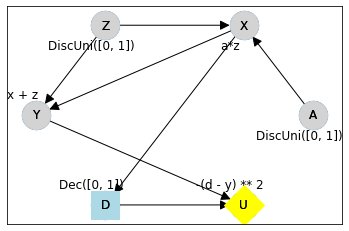

In [3]:
cid = CID([
    ('A', 'X'),  # defining the graph's nodes and edges
    ('Z', 'X'),
    ('Z', 'Y'),
    ('X', 'D'),
    ('X', 'Y'),
    ('D', 'U'),
    ('Y', 'U')
],
    decision_nodes=['D'],
    utility_nodes=['U'])

cpd_A = UniformRandomCPD('A', 2)
cpd_Z = UniformRandomCPD('Z', 2)
cpd_X = FunctionCPD('X', lambda a, z: a*z, evidence=['A', 'Z'])
cpd_D = DecisionDomain('D', [0, 1])
cpd_Y = FunctionCPD('Y', lambda x, z: x + z, evidence=['X', 'Z'])
cpd_U = FunctionCPD('U', lambda d, y: -(d - y) ** 2, evidence=['D', 'Y'])

cid.add_cpds(cpd_A, cpd_D, cpd_Z, cpd_X, cpd_Y, cpd_U)

cid.draw()

In [4]:
cid.impute_conditional_expectation_decision('D', 'Y')
cid.expected_utility({})  # should be -0.1666

/Users/tomeveritt/.local/share/virtualenvs/pycid-7zdQ1pMl/lib/python3.9/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:788: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
Eliminating: D: 100%|██████████| 2/2 [00:00<00:00, 448.11it/s]


-0.16666666666666669

In [5]:
introduced_total_effect(cid, 'A', 'D', 'Y', 0, 1)

Eliminating: D: 100%|██████████| 4/4 [00:00<00:00, 434.89it/s]


0.3333333333333335

Eliminating: D: 100%|██████████| 4/4 [00:00<00:00, 518.87it/s]


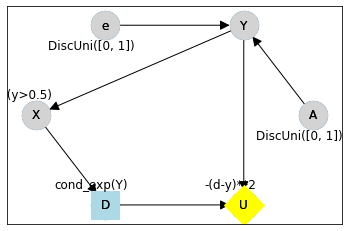

In [6]:
cid = CID([
    ('A', 'Y'),  # defining the graph's nodes and edges
    ('e', 'Y'),
    ('Y', 'X'),
    ('X', 'D'),
    ('D', 'U'),
    ('Y', 'U')],
    decision_nodes=['D'],
    utility_nodes=['U'])

def func_y(a, e):
    if a==0 and e==0:
        return 0
    elif a==0 and e==1:
        return 0.75
    elif a==1 and e==0:
        return 0
    else:
        return 1

cpd_e = UniformRandomCPD('e', 2)
cpd_A = UniformRandomCPD('A', 2)
cpd_Y = FunctionCPD('Y', func_y, evidence=['A', 'e'])
cpd_X = FunctionCPD('X', lambda y: int(y>0.5), evidence=['Y'])
cpd_D = DecisionDomain('D', [0, 1])

cpd_U = FunctionCPD('U', lambda d, y: -(d-y)**2, evidence=['D', 'Y'])

cid.add_cpds(cpd_A, cpd_D, cpd_e, cpd_X, cpd_Y, cpd_U)
cid.impute_conditional_expectation_decision('D', 'Y')

cid.draw()

In [7]:
introduced_total_effect(cid, 'A', 'D', 'Y', 0, 1)

Eliminating: D: 100%|██████████| 5/5 [00:00<00:00, 439.02it/s]


-0.125